# PART 2 - OPTIMIZATION

*Similar to the traveling sales man problem, this is a circular route. Each of the three ferries are to visit 12 stops[0-11] which will be randomly split into 3 groups of 4 stops.  The first departure port will be the origin port, followed by 3 other stops and finally back to origin, hence completing the circuit. A->B->C->D->A*

Given a 12x12 matrix there are 12! possible route combinations. We need a way to generate the route using a optimization technique using a Genetic Algorithm.

This is a multi objective problem, minimizing both the travel distance as well as ensuring routes are of equal length.

No benchmark test case was provided, hence we do not know for sure if we have reached the right answer. 

## Task 2.1 Generation of random solutions

- Load the data
- Import libraries
- Add headings
- Setup data frames
- Display the matrix, fitness of a random route

Data has been recorded in scientific notation, and will be converted to float using Padnas read_csv library.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', 100) # Sets max coloumn with for displaying dataframes
try:
    stops_cols = ["Longitude", "Latitude"]
    stops = pd.read_csv('stops.csv',names=stops_cols)
    distances_cols = ['stop0','stop1','stop2','stop3','stop4','stop5','stop6','stop7','stop8','stop9','stop10','stop11']
    distances = pd.read_csv('distances.csv',names=distances_cols)
    distance_matrix = distances.to_numpy()
    display(stops,distances)
except Exception as e:
  print("There was an error loading the file, make sure it is in root: ",e)

,Longitude,Latitude
0,6.084592,3.647243
1,3.757416,5.566100
2,4.804498,4.596598
3,4.703749,4.920296
4,-8.178210,-0.909409
5,-7.778165,-1.765424
6,-7.054886,-2.096278
7,-8.078685,-0.019262
8,0.319826,1.534481
9,1.489526,2.431312


,stop0,stop1,stop2,stop3,stop4,stop5,stop6,stop7,stop8,stop9,stop10,stop11
0,0.000000,3.016249,1.593711,1.878135,14.972996,14.881969,14.339942,14.630164,6.139730,4.753223,7.337186,9.437255
1,3.016249,0.000000,1.426995,1.145691,13.579080,13.668243,13.252092,13.087764,5.298205,3.869137,7.183670,8.523919
2,1.593711,1.426995,0.000000,0.339015,14.102015,14.099600,13.617620,13.685123,5.430363,3.959483,7.016806,8.761438
3,1.878135,1.145691,0.339015,0.000000,14.139672,14.159697,13.692984,13.703644,5.539180,4.065252,7.196627,8.859165
4,14.972996,13.579080,14.102015,14.139672,0.000000,0.944880,1.634171,0.895693,8.842467,10.228662,8.306492,5.681336
5,14.881969,13.668243,14.099600,14.159697,0.944880,0.000000,0.795359,1.771833,8.744531,10.173626,7.982827,5.470240
6,14.339942,13.252092,13.617620,13.692984,1.634171,0.795359,0.000000,2.315634,8.220024,9.669853,7.326569,4.902991
7,14.630164,13.087764,13.685123,13.703644,0.895693,1.771833,2.315634,0.000000,8.541025,9.877043,8.225050,5.536049
8,6.139730,5.298205,5.430363,5.539180,8.842467,8.744531,8.220024,8.541025,0.000000,1.473941,2.174070,3.334985
9,4.753223,3.869137,3.959483,4.065252,10.228662,10.173626,9.669853,9.877043,1.473941,0.000000,3.352873,4.801986


**Point of interest**: It is assumed that the *stops.csv* file contains coordinates in scientific notation of latitude and longitude.  In an attempt to familiarize myself with the dataset, plotting the stops would visually help in understanding the optimization problem. It was noted that the stops are located near the coast of West Africa, an interesting choice. However when mapping the distances between the stops and tallying the distances with the matrix provided, I was unable to reach the same measurement. It is possible that the distance matrix is stored in a metric other then KM, perhaps earth radius. 

Nevertheless in this scenario, only the number of stops are relevant and not their precise location. In a real world setting, assuring data accuracy and inconsistencies would be the first step before Optimization.

[Map link on github](https://raw.githubusercontent.com/ricky11/COMP2002-AI/master/1.1%20Data%20Prep/mappeddata.png?token=GHSAT0AAAAAACBDTAHDAQBIRPXKFU56L5A4ZDDF52Q).

![image](https://raw.githubusercontent.com/ricky11/COMP2002-AI/master/1.1%20Data%20Prep/mappeddata.png?token=GHSAT0AAAAAACBDTAHDAQBIRPXKFU56L5A4ZDDF52Q)





- Generate Random Solution

Following standard Object oriented principles our Generate class will have two methods. One to output a brand new solution and a Getter to get the current solution.

In [ ]:
import random

class Generate():
    def __init__(self):
        self.num_vessels = 3
        self.stops_per_route = 4
        self.routes_np = None
        self.stops = stops
        self.stop_indices = list(range(0, len(stops)))
        

    def make_random_solution(self): # Generate initial solution
        random.shuffle(self.stop_indices)
        # divide the stops into sublists of length stops_per_route
        routes = np.array_split(self.stop_indices, self.num_vessels)
        self.routes_np = np.array(routes)
        return self.routes_np
    
    @property # Getter, no need to access like a method()
    def get_routes(self): # Can be called to obtain the current solution routes
        if self.routes_np is None:
            self.make_random_solution()
        return self.routes_np

generate = Generate() # Instantiate the Generate class


- Fitness function

*My Fitness function below returns a score by using the total distance traveled from the matrix  * standard deviation. This function will help to minimize both the total distance and the variability (standard deviation) of route lengths within the groups, hence allow us to evenly distribute route lengths amongst the groups.*

In [64]:

# Helper function to calculate the route distance of each stop for each route group
def calc_route_distance(choosen_route):
    total_distance = 0
    route_distance_matrix = []
    for i, stop in enumerate(choosen_route):
        if i < len(choosen_route) - 1:
            next_stop = choosen_route[i + 1]
            route_distance_matrix.append((distance_matrix[stop][next_stop]))
            total_distance += distance_matrix[stop][next_stop]
    # Return back to the origin stop (Circuit)
    total_distance += distance_matrix[choosen_route][-1][choosen_route][0]
    route_distance_matrix.append((distance_matrix[choosen_route][-1][choosen_route][0]))
    return total_distance,route_distance_matrix


 # Gets the fitness of a given route(s)
def get_fitness(routes):
    route_distance = []
    
    for route in routes:
         #Returns the Route Distance(rd) for each group of 4, Returns Each Path Distance(epd)
         rd,epd = calc_route_distance(route)
         route_distance.append(rd)
    
    # Standard deviation - Shows the dispersement of distances, used to aid in fitness score

    std_dev = np.std(route_distance) # Less then 1.0 means the route lengths are more or less even.
    # 
    
    """ 
    We decided not to use a weight, given that we should give equal weight to both route length and distance.
    We discuss this in detail in our Conclusion.
    We could have used: 
    weight = 100, where we give more dominance to the route distance, but decided against it for this scenario.
    fitness_score = (weight * np.sum(route_distance)) * std_dev
    """
    #Fitness score calculation, giving equal weight to both route distance and route length.
    fitness_score =  np.sum(route_distance) * std_dev
  
    return route_distance,fitness_score,std_dev


Call the fitness function to print out the results of a random route. This is the timetable we will submit to the fitness function.

In [71]:
# Get the random route

random_route = generate.make_random_solution() 

print("Random 3 Route Generation \n", random_route) 

#Send the route to the fitness function
route_distance,fitness_score,std_dev = get_fitness(random_route)

print("3 Route Group Distances, including back to origin =" , route_distance)
print("Fitness Score (Minimizing, Lower is better) - (np.sum(route_distance) * std_dev)) ="  , fitness_score)
print("Standard deviation - Shows the dispersement of distances, closer to 0 indicates a more even route =", std_dev)
threshold = 1
if std_dev < threshold:
    print("\nThe mean distances are approximately even.")
else:
     print("\nThe mean distances are not even.")

Random 3 Route Generation 
 [[10  0  5  6]
 [ 7 11  3  8]
 [ 4  9  2  1]]
3 Route Group Distances, including back to origin = [30.341082869381673, 28.475419498101488, 29.194220122471567]
Fitness Score (Minimizing, Lower is better) - (np.sum(route_distance) * std_dev)) = 67.6193018718504
Standard deviation - Shows the dispersement of distances, closer to 0 indicates a more even route = 0.7683075420675958

The mean distances are approximately even.


## Task 2.2 Algorithm Implementation

- Define mutation operator class (Shuffle, Swap & Ruin-Recreate.)
- Set up hillclimber local search to incrementally find the best solution
- Print out 3 routes after 1 pass of the HillClimber with 30 iterations of perturbation.

In [ ]:
import copy #For deep copy of multidimensional arrays

class Mutation_Operators():
    def __init__(self):
        pass
    
    def shuffle(self,solution): # Mutate a single group of 4 stops and shuffling their order
        child = copy.deepcopy(solution)
        random_group = np.random.randint(0,len(child))
        np.random.shuffle(child[random_group])
        return child
        
    
    def swap(self,solution): # Pick two random stops from distinct groups and exchange their positions in the solution.
        child = copy.deepcopy(solution)
        group1, group2 = np.random.choice(range(len(child)), 2, replace=False)
        pos1 = np.random.randint(0, len(child[group1]))
        pos2 = np.random.randint(0, len(child[group2]))
        child[group1][pos1], child[group2][pos2] = child[group2][pos2], child[group1][pos1]
        return child
  
        
    def ruin_and_recreate(self,best_solution): # Creates a new random solution from scratch
        return generate.make_random_solution()
        

- Test the mutations

In [79]:
random_solution = generate.make_random_solution()
mo = Mutation_Operators()
print("Random Solution: \n", random_solution)
print("-----Swap-----") 
print(mo.swap(random_solution))
print("----Shuffle----") 
print(mo.shuffle(random_solution))
print("--Ruin-And-Recreate--") 
print(mo.ruin_and_recreate(random_solution))

Random Solution: 
 [[ 2  5  9  0]
 [ 7 11 10  4]
 [ 3  1  8  6]]
-----Swap-----
[[ 2 10  9  0]
 [ 7 11  5  4]
 [ 3  1  8  6]]
----Shuffle----
[[ 2  5  0  9]
 [ 7 11 10  4]
 [ 3  1  8  6]]
--Ruin-And-Recreate--
[[ 7  6  4 10]
 [ 1  5  2  9]
 [ 3  0 11  8]]


Prepare Hillclimber class

- Create the hillclimber class with initial random solutions
- Loop over all operators (each for 30 times)
- Compare the solutions i.e. if child_fitness < self.best_fitness:
- Save all child solutions, fitness, standard deviations, operator names in to an Archive "fit"
- Save the best solutions for each run in  "best_overall" 
- Save some aggregations to be used later in "agg" (used for plotting)

In [81]:
import copy # For deep copying
pd.set_option('display.max_rows',5)

class HillClimber():
    def __init__(self):
        # Instantiate the class containing the operators
        self.mo = Mutation_Operators()
        
        # Generate initial random solution and initial fitness for each operator starting point
        self.initial_random_solution = generate.make_random_solution()    
        self.best_solution = copy.deepcopy(self.initial_random_solution)
        self.route_distance,self.fitness_score,self.std_dev = get_fitness(self.best_solution)
        self.initial_std_dev = copy.deepcopy(self.std_dev)
        self.initial_fitness = np.sum(self.fitness_score)
        self.best_fitness = copy.deepcopy(self.initial_fitness)
        self.best_overall = []
   
        # Define the operator list
        self.operator_list =  [
                                {"label" : "Swap", "operator" : self.mo.swap},
                                {"label" : "Shuffle", "operator" : self.mo.shuffle},
                                {"label" : "Ruin and Create", "operator" : self.mo.ruin_and_recreate},     
                        ]
    
        
    def runMutationOperators(self,operatorIterations):
        fit = []
        self.best_overall = []

        for operator in self.operator_list: 
            label = operator["label"]
            mutation_operator = operator["operator"] 
            fit.append((label,0,self.initial_random_solution,self.route_distance,self.initial_std_dev,self.initial_fitness,self.best_fitness))
            
            for _ in range(operatorIterations):
                child_solution = mutation_operator(self.best_solution)
                route_distance,self.fitness_score,self.std_dev = get_fitness(child_solution)
                child_fitness = np.sum(self.fitness_score)
               
                                          
                if child_fitness < self.best_fitness:
                    # print("CHILD Won", child_fitness, "VS", self.best_fitness)
                    self.best_solution = copy.deepcopy(child_solution)
                    self.best_fitness = copy.deepcopy(child_fitness)
                # else:
                    # print("PARENT Won", self.best_fitness, "VS", child_fitness)
                fit.append((label,_,child_solution,route_distance,self.std_dev,child_fitness,self.best_fitness))
            
            calc_best = get_fitness(self.best_solution)
            self.best_overall.append((label,self.best_fitness,self.best_solution,calc_best[0],calc_best[2]))
            # Reset Solutions & Fitness for next operator to initial random values
            self.best_solution = copy.deepcopy(self.initial_random_solution)
            self.best_fitness = copy.deepcopy(self.initial_fitness)
        return fit,self.best_overall
            

    
    def runHillClimber(self,operatorIterations):
        columns=["Mutation", "Round #", "Solution","Route Distance", "Standard Dev", "Fitness score", "Best Fitness"]
        fit,best= self.runMutationOperators(operatorIterations)
        agg = pd.DataFrame(fit, columns=columns)
        agg = agg.groupby(["Mutation"])["Fitness score"].agg(["max", "min", "mean"]).reset_index().values.ravel()
        return fit,best,agg
       
    

### Run the hillclimber 

What was the best solution and best score for each operator?

*Re-run this to view different results each time*

We have including a **ASSERT Unit Test**, in order to test if the solution is sub-optimal. No Assertion is good! If an error is generated, re run the scenario.

In [91]:
pd.set_option('display.max_rows', None)
hc = HillClimber()
operatorIterations = 30
fit,best_overall,_ = hc.runHillClimber(operatorIterations)
title = f"Best Overall for 1 runs and {operatorIterations} mutation runs each"
print(title)
print("-" * len(title))
best_overall_df = pd.DataFrame(best_overall,columns=["Mutation","Best Fitness Score", "Best Route Solution","Route Distance", "Std_dev"])
sorted = best_overall_df.sort_values(by='Best Fitness Score')
display(sorted)
print(f"{sorted.iloc[0]['Mutation']} was the best operator with a score of {sorted.iloc[0]['Best Fitness Score']}")

# Asserts (Unit Test) if the Standard Deviation is greater then 1.
# which indicates the multiple objectives were not met.
assert sorted.iloc[0]["Std_dev"] <= 1.00 , "Poor solution, please regenerate"


Best Overall for 1 runs and 30 mutation runs each
-------------------------------------------------


,Mutation,Best Fitness Score,Best Route Solution,Route Distance,Std_dev
0,Swap,43.039436,"[[8, 0, 9, 6], [5, 7, 2, 3], [1, 10, 11, 4]]","[28.782829950595794, 29.955666720476316, 29.151405933149274]",0.489697
2,Ruin and Create,47.646232,"[[0, 1, 9, 6], [3, 11, 4, 10], [5, 8, 2, 7]]","[30.895181320057574, 30.043619982596354, 29.63184962449703]",0.526067
1,Shuffle,253.981617,"[[5, 7, 6, 9], [8, 4, 1, 3], [0, 11, 10, 2]]","[23.93094561988901, 29.10641821016149, 20.755093226329375]",3.441837


Swap was the best operator with a score of 43.03943550973483


- Plot of 1 run with 30 mutations showing a minimizing fitness score.

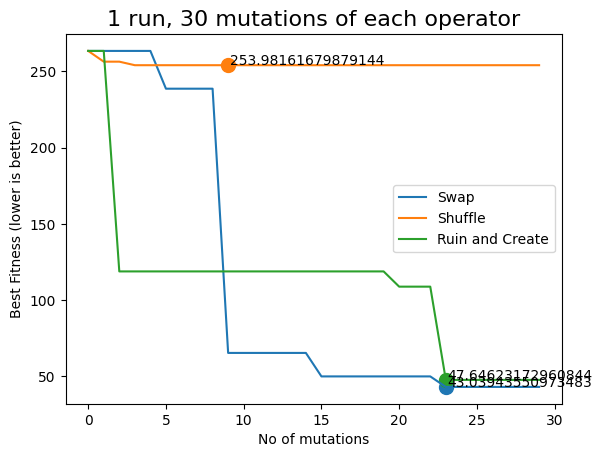

In [93]:
column_headings = ["Mutation", "Round #", "Solution","Route Distance" ,"Standard Dev", "Fitness score", "Best Fitness"]
dataframe = pd.DataFrame(fit,columns=column_headings)
# display(dataframe)
operators = dataframe["Mutation"].unique()
for operator in operators:
    operator_data = dataframe[dataframe["Mutation"] == operator]
    plt.plot(operator_data["Round #"], operator_data["Best Fitness"], label=operator)
    
    min_fitness_idx = operator_data["Fitness score"].idxmin()
    min_fitness_row = operator_data.loc[min_fitness_idx]
    
    plt.scatter(min_fitness_row["Round #"], min_fitness_row["Fitness score"], marker="o", s=100)
    plt.text(min_fitness_row["Round #"] + 0.1, min_fitness_row["Fitness score"], f"{min_fitness_row['Best Fitness']}")

plt.xlabel("No of mutations")
plt.ylabel("Best Fitness (lower is better)")
plt.title("1 run, 30 mutations of each operator", fontsize=16)
plt.legend()

Based on the Plot and the Dataframe above, I believe the optimizer is producing a sensible solution due to the decreasing fitness score.  It is possible that the operators leave some mutations stuck in a local optima (shuffle in my recent testing), while others like the swap are able to find the global optima. 

### View Fitness Archive

View all 90 mutations and their Score. (The "fit" variable contains the ARCHIVE of all the data)
- 30 Rounds each excluding the initial random solution
- Showing the Fitness score of the child as well as the current best Fitness.
- This data will be used in the Visualization of results section

In [94]:
column_headings = ["Mutation", "Round #", "Solution","Route Distance","Standard Dev", "Fitness score", "Best Fitness"]
dataframe = pd.DataFrame(fit,columns=column_headings)
dataframe

,Mutation,Round #,Solution,Route Distance,Standard Dev,Fitness score,Best Fitness
0,Swap,0,"[[5, 7, 9, 6], [8, 4, 1, 3], [2, 10, 11, 0]]","[22.114087633581786, 29.10641821016149, 20.75509322632937]",3.658843,263.347409,263.347409
1,Swap,0,"[[5, 7, 9, 6], [2, 4, 1, 3], [8, 10, 11, 0]]","[22.114087633581786, 29.165800548099934, 20.458376794481797]",3.775466,270.845349,263.347409
2,Swap,1,"[[5, 7, 8, 6], [9, 4, 1, 3], [2, 10, 11, 0]]","[19.32824194886357, 29.018684869094542, 20.75509322632937]",4.271710,295.183771,263.347409
3,Swap,2,"[[5, 7, 9, 6], [8, 4, 1, 11], [2, 10, 3, 0]]","[22.114087633581786, 34.2804496510657, 17.685279305665215]",7.016127,519.753427,263.347409
4,Swap,3,"[[5, 7, 10, 6], [8, 4, 1, 3], [2, 9, 11, 0]]","[18.11881091003774, 29.10641821016149, 19.79243545448116]",4.833664,323.940903,263.347409
5,Swap,4,"[[5, 7, 8, 6], [9, 4, 1, 3], [2, 10, 11, 0]]","[19.32824194886357, 29.018684869094542, 20.75509322632937]",4.271710,295.183771,263.347409
6,Swap,5,"[[5, 4, 9, 6], [8, 7, 1, 3], [2, 10, 11, 0]]","[21.63875376416478, 28.313661485064184, 20.75509322632937]",3.374203,238.581476,238.581476
7,Swap,6,"[[5, 4, 9, 11], [8, 7, 1, 3], [2, 10, 6, 0]]","[21.44576829437602, 28.313661485064184, 30.277027733686406]",3.786143,303.029471,238.581476
8,Swap,7,"[[3, 4, 9, 6], [8, 7, 1, 5], [2, 10, 11, 0]]","[47.73117109805837, 44.04156445237446, 20.75509322632937]",11.942370,1343.848917,238.581476
9,Swap,8,"[[5, 4, 9, 6], [8, 11, 1, 3], [2, 10, 7, 0]]","[21.63875376416478, 18.54377469451303, 31.465730476049053]",5.508834,394.698393,238.581476


## Task 2.3 Visualisation of results

We will plot two graphs to demonstrate the comparison between each mutator and display the average, maximum and minimum fitness at each iteration. We will run the algorithm 500 times with a different initial solution. Allow 30-45 seconds to run.
 - Bar Chart
 - Box Plot

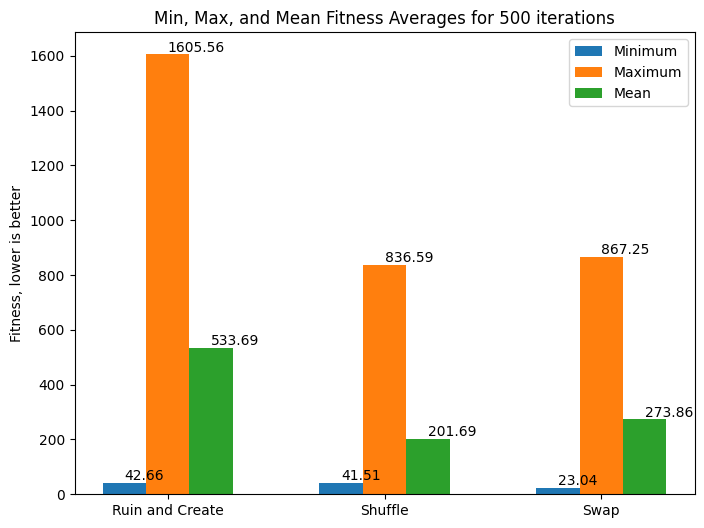

In [96]:
operatorIterations = 30 # 30 mutation iterations for each operator
algoIterations = 500 # Repeat 500 times
arr = [] # Holds the fitness,max,min,avg from each iteration
best_sol = []
columns=(["Mutation","Best Fitness Score", "Best Route Solution","Route Distance", "Std_dev"])

# Loop the entire algorithm 500 times, append the best solution
# Call the hill climber class, return the best solutions for each opertor iteration
hc = HillClimber() # Instantiate the class outside of the loop, gets a new random solution for each iteration (500) 
for i in range(algoIterations): 
    _,best,agg = hc.runHillClimber(operatorIterations)
    best_df = pd.DataFrame(best,columns=["Mutation","Best Fitness Score", "Best Route Solution","Route Distance", "Std_dev"])
    best_df = best_df.sort_values(by='Best Fitness Score')
    best_sol.append(best_df.iloc[0,0])
    arr.append(agg)
arr = np.array(arr)

operators = arr[0, np.arange(0, arr.shape[1], 4)]

# get the minimum, maximum, and mean values for each operator
min_values = arr[:, np.arange(2, arr.shape[1], 4)].astype(float)
max_values = arr[:, np.arange(1, arr.shape[1], 4)].astype(float)
mean_values = arr[:, np.arange(3, arr.shape[1], 4)].astype(float)

# create a grouped bar plot of the minimum, maximum, and mean values for each operator
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x = np.arange(len(operators))
ax.bar(x-bar_width, min_values.mean(axis=0), width=bar_width, label='Minimum')
ax.bar(x, max_values.mean(axis=0), width=bar_width, label='Maximum')
ax.bar(x+bar_width, mean_values.mean(axis=0), width=bar_width, label='Mean')
ax.set_xticks(x)
ax.set_xticklabels(operators)
ax.set_ylabel('Fitness, lower is better')
ax.legend()
ax.set_title('Min, Max, and Mean Fitness Averages for 500 iterations')

# add text labels to the bars
for i, val in enumerate(min_values.mean(axis=0)):
    ax.text(i-bar_width, val+10, '{:.2f}'.format(val))
for i, val in enumerate(max_values.mean(axis=0)):
    ax.text(i, val+10, '{:.2f}'.format(val))
for i, val in enumerate(mean_values.mean(axis=0)):
    ax.text(i+bar_width, val+10, '{:.2f}'.format(val))
plt.show()

Box Plot

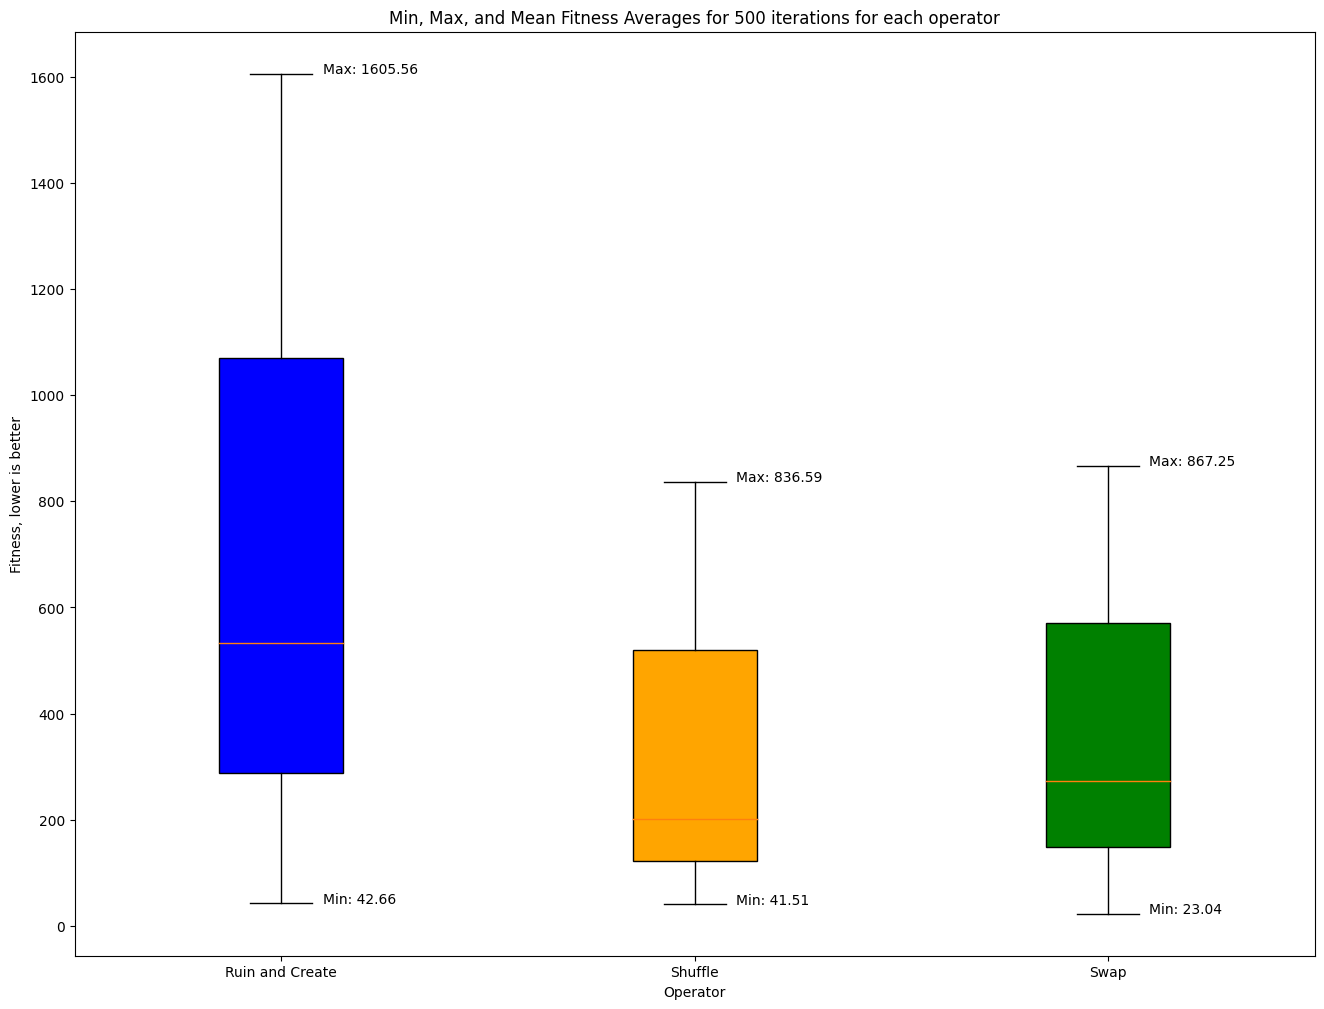

In [97]:
concat_data = np.vstack(arr)

# Reshape the concatenated data to have 4 columns
reshaped_data = concat_data.reshape(-1, 4)

# Create a DataFrame
cols = ['Operator', 'max_fitness', 'min_fitness', 'avg_fitness']
df = pd.DataFrame(reshaped_data, columns=cols)
df[['max_fitness', 'min_fitness', 'avg_fitness']] = df[['max_fitness', 'min_fitness', 'avg_fitness']].astype(float)

# Prepare data for the box plot
operators = df['Operator'].unique()
num_operators = len(operators)
grouped = df.groupby('Operator')

# Create a list of  statistics for each operator
summary_data = []
for op in operators:
    group = grouped.get_group(op)
    summary = [group['max_fitness'].mean(), group['min_fitness'].mean(), group['avg_fitness'].mean()]
    summary_data.append(summary)

# Plot
fig, ax = plt.subplots(figsize=(16, 12))
bp = ax.boxplot(summary_data, patch_artist=True, labels=operators)

# Set colors for box plots
colors = ['blue', 'orange', 'green']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for i, (op, summary) in enumerate(zip(operators, summary_data)):
    max_val = np.max(summary)
    min_val = np.min(summary)
    ax.annotate(f'Max: {max_val:.2f}', xy=(i+1.1, max_val), xytext=(i+1.1, max_val), fontsize=10)
    ax.annotate(f'Min: {min_val:.2f}', xy=(i+1.1, min_val), xytext=(i+1.1, min_val), fontsize=10)
    

ax.set_xlabel('Operator')
ax.set_ylabel('Fitness, lower is better')
ax.set_title('Min, Max, and Mean Fitness Averages for 500 iterations for each operator')


plt.show()

# Conclusion

From the above two graphs we can deduce the following:

- In all circumstances, ruin & create destroy the previous solution, even if the parent solution has a improved fitness score.  The solution does not necessarily get better overtime, however as you can see from the Box plot, the minimums for Ruin & Create is on par with Swap and even better then Shuffle, but why? This could be because Ruin & Create is able to escape the *local optima* and explore different regions of the search space, and may randomly reach a *global optima.* However this mutation is generally not recommend on its own.

- Shuffle & Swap both have a lower mean fitness then Ruin & Create, however due to Shuffles limited perturbation, this causes it to sink into a local optima without escape, which is why you see a higher minimum then Swap.

- In this example during my tests I found **Swap** to be the best optimizer due to the fact that its overall mean and min fitness after 500 iterations, each staring from a random solution always generated a lower score then the other two optimizers. **
  
In our test, *Swap* reached a fitness score of about 44 calculated at *np.sum(route_distance) * std_dev*  ensuring that both objectives have been minimized i.e. the travel distance and the evenness of the length. Going forward we can safely assume that in order to calculate the best solution, swap would be the optimal operator to use.

Overall, while the Hillclimber is a simple method for optimization for our small dataset, it will usually fall into a local optima and may lead to a suboptimal solution, there is no guarantee of reaching a global optimum. One solution to this is using Crossover which combines genes from two or more parents to escape from these deep dark valleys.

**It is possible that our fitness function has a trade off between equal route length and route distance as this was a Multi-objective optimization problem. In our fitness function we gave equal weight to both distance and route length, *np.sum(route_distance) * std_dev*.  A more optimal solution could have been to add a weighting to one objective, without one objective dominating another. A good solution for route distance, maybe a poor solution for route length and vice versa. 




